### Modèles de Régression avec scikit-learn


#### House pricing

The objective of this test is to predict, using regression models, the price of a house as a function of relevant variables representing different architectural, geographic and neighborhood characteristics.

The dataset used contains many attributes allowing to describe 1460 houses according to several characteristics as well as a target variable: 'SalePrice' containing the selling price of the property in question.

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, LassoCV

import matplotlib.pyplot as plt
%matplotlib inline

Read the file "house_price.csv" in a data frame called hp

In [2]:
hp = pd.read_csv("/Users/shahul/Desktop/dataset/house_pricing.csv")
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Replace, for each variable, the missing values by the mean of the variable

In [3]:
#hp.dtypes.head(20) #checking data types
#hp.info()

#replace nan by their mean
hp = hp.fillna(hp.mean()) 

#re-checking again
# hp.isna().sum() 
hp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Center and reduce the numerical variables of the data frame, using an instance of the class
preprocessing.StandardScaler

In [4]:
# to filter only numerical columns
num_cols = hp._get_numeric_data().columns
hp[num_cols] = pd.DataFrame(preprocessing.StandardScaler().fit_transform(hp[num_cols]))

hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,RL,-0.229372,-0.207142,Pave,NaN,Reg,Lvl,AllPub,...,-0.068692,NaN,NaN,NaN,-0.087688,-1.599111,0.138777,WD,Normal,0.347273
1,-1.728492,-0.872563,RL,0.451936,-0.091886,Pave,NaN,Reg,Lvl,AllPub,...,-0.068692,NaN,NaN,NaN,-0.087688,-0.489110,-0.614439,WD,Normal,0.007288
2,-1.726120,0.073375,RL,-0.093110,0.073480,Pave,NaN,IR1,Lvl,AllPub,...,-0.068692,NaN,NaN,NaN,-0.087688,0.990891,0.138777,WD,Normal,0.536154
3,-1.723747,0.309859,RL,-0.456474,-0.096897,Pave,NaN,IR1,Lvl,AllPub,...,-0.068692,NaN,NaN,NaN,-0.087688,-1.599111,-1.367655,WD,Abnorml,-0.515281
4,-1.721374,0.073375,RL,0.633618,0.375148,Pave,NaN,IR1,Lvl,AllPub,...,-0.068692,NaN,NaN,NaN,-0.087688,2.100892,0.138777,WD,Normal,0.869843


Transform each categorical variable into indicator variables.

In [5]:
#select categorical variables
cat_cols = hp.select_dtypes(exclude=['int', 'float']).columns

#transform to indicator variables
hp[cat_cols] = pd.get_dummies(cat_cols)

hp = hp.fillna(hp.mean())


Separate the target variable 'SalePrice' in target and the rest of the variables in feats

In [6]:
target = hp.SalePrice
feats = hp.drop('SalePrice', axis=1)
#feats.head()
#target.head()

Separate the data into a training set (X_train, y_train) and a test set (X_test, y_test), with 20% of the original data for the test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2)

Create a function rmse_cv, which calculates for a given model, the root mean square error obtained by cross validation with 5 samples, thanks to the cross_val_score function of sklearn.model_selection.
The scoring argument of the cross_val_score()function allows to choose the metric we want to use.
The metric "neg_mean_squared_error" returns the negative mean square error.

In [9]:
from sklearn.linear_model import RidgeCV

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train,  scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

ridge_reg = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))

rmse_cv(ridge_reg)

array([0.33763887, 0.4470026 , 0.41729511, 0.53442783, 0.64872721])

Create an alphas vector containing the values [0.01, 0.05, 0.1, 0.3, 0.8, 1, 5, 10, 15, 30, 50].
Display in a graph, the RMSE returned by the rmse_cv function applied to a Ridge(alpha =αα) regression model for each αα belonging to alphas.

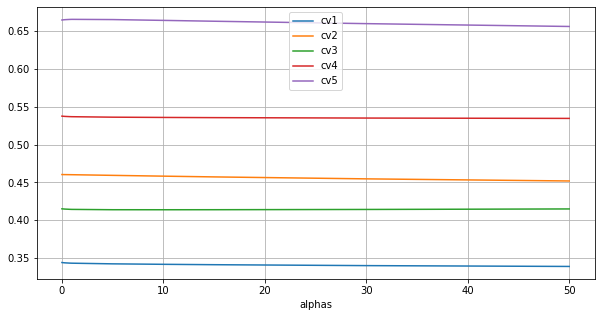

In [11]:
alphas = [0.01, 0.05, 0.1, 0.3, 0.8, 1, 5, 10, 15, 30, 50]

RMSE = []

for a in alphas:
    ridge = Ridge(alpha=a)
    x = rmse_cv(ridge) #rmse_cv applied to ridge regression
    RMSE.append(x)

#changing into a dataframe
alphas1 = pd.DataFrame(alphas)
RMSE1 = pd.DataFrame(RMSE)

#showing axis
result= pd.concat([alphas1, RMSE1], axis=1)
result
result.columns = ['alphas', 'cv1','cv2','cv3', 'cv4', 'cv5']
result.set_index('alphas').plot(figsize=(10,5), grid=True);


score test : 0.8023449262462228  pour alpha = 1
score train : 0.8143600572473473  pour alpha = 0.01


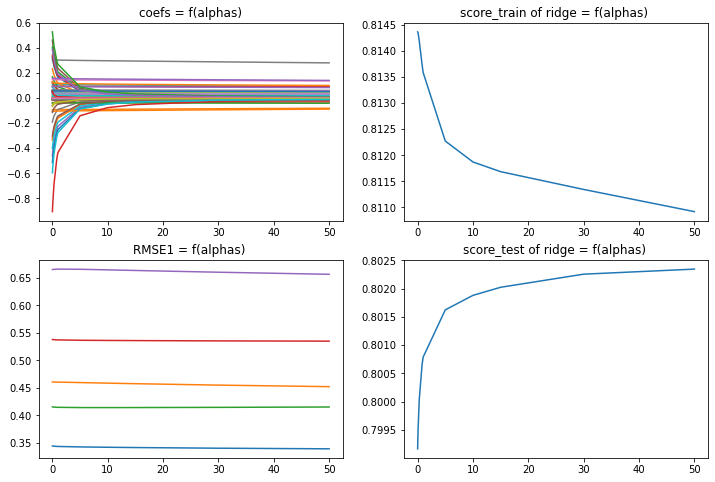

In [13]:
'''I also tried to show data in an other, more detailed way, here it is '''

alphas = [0.01, 0.05, 0.1, 0.3, 0.8, 1, 5, 10, 15, 30, 50]

coefs = []
RMSE1 = [] #rmase_cv value for each alpha
score_test = [] #list of score of ridge model test for different alpha
score_train = [] #list of score of ridge model train for different alpha
for a in alphas:
    ridge = Ridge(alpha=a)
    x = rmse_cv(ridge) #rmse_cv applied to ridge regression
    RMSE1.append(x)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    q=ridge.score(X_train, y_train)
    score_train.append(q)
    p=ridge.score(X_test, y_test)
    score_test.append(p)
    
    

fig = plt.figure(figsize=(12, 8));
sub1 = fig.add_subplot(221) ;
sub1.set_title('coefs = f(alphas)');
sub1.plot(alphas, coefs);

sub2 = fig.add_subplot(222) ;
sub2.set_title('score_train of ridge = f(alphas) ');
sub2.plot(alphas, score_train);
#sub2.invert_yaxis()

sub3 = fig.add_subplot(223) ;
sub3.set_title('RMSE1 = f(alphas) ');
sub3.plot(alphas, RMSE1);

sub4 = fig.add_subplot(224) ;
sub4.set_title('score_test of ridge = f(alphas) ');
sub4.plot(alphas, score_test);

print("score test :", max(score_test), " pour alpha = 1")
print("score train :", max(score_train), " pour alpha = 0.01")


From the displayed graph, create a performing Ridge regression model
Test the performance of this model on X_test

In [14]:
# on obtient le score dans l'echantillon d'entrainenement le plus elevée pour a = 0.01 donc : 
lr_reg = Ridge (alpha = 0.01)
lr_reg.fit(X_train, y_train)

print("score train :", lr_reg.score(X_train, y_train))
print("score test :", lr_reg.score(X_test, y_test))

ridge_pred_train1 = lr_reg.predict(X_train)
ridge_pred_test1 = lr_reg.predict(X_test)

print("mse train:", mean_squared_error(ridge_pred_train1, y_train))
print("mse test:", mean_squared_error(ridge_pred_test1, y_test))

print('''
score correct, l'écart d'erreur est acceptable entre l'échantillon d'entraînement et l'échantillon de test,
cela permet de conclure que le modèle n'est pas overfit sur les données d'apprentissage.''')

score train : 0.8143600572473473
score test : 0.7991681733988378
mse train: 0.18309008174964891
mse test: 0.21164441324505492

score correct, l'écart d'erreur est acceptable entre l'échantillon d'entraînement et l'échantillon de test,
cela permet de conclure que le modèle n'est pas overfit sur les données d'apprentissage.


Create a Lasso regression model that will choose the parameter αα from [10, 1, 0.1, 0.001, 0.0005] by cross-validation, using the LassoCV function
Display the performance of the model on the test sample

In [15]:
alphas = [10, 1, 0.1, 0.001, 0.0005]

model_lasso = LassoCV(alphas = alphas).fit(X_train, y_train)

pred_test = model_lasso.predict(X_test)

print("score test:", model_lasso.score(X_test, y_test))
print("mse test:", mean_squared_error(pred_test, y_test))
print("alpha sélectionné par c-v :" ,model_lasso.alpha_)


score test: 0.8025345768657615
mse test: 0.20809676594949889
alpha sélectionné par c-v : 0.001


From the coefficients returned by the Lasso regression model, display the number of variables 
kept and the number of variables eliminated by the model

     alpha  Nb non-zero coefs
0  10.0000                  0
1   1.0000                  0
2   0.1000                 11
3   0.0010                 33
4   0.0005                 36


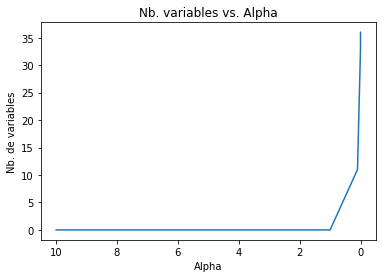

for selected coefs: 0.001 by the model whe have kept:
  33  variables out of 80, so  47 variables are rejected 



In [17]:
from sklearn.linear_model import lasso_path

mes_alphas = (10, 1, 0.1, 0.001, 0.0005)

#get coefs values for each alpha 
alpha_path, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=mes_alphas)

'''coefs_lasso is the matrix of coefficients with 80 rows (because 80 variables
explanatory) and 5 columns (because 5 different values of α tried)'''

#number of coefs. non-zero for each alpha
nbNonZero = np.apply_along_axis(func1d=np.count_nonzero,arr=coefs_lasso,axis=0)

print(pd.DataFrame({'alpha':alpha_path,'Nb non-zero coefs':nbNonZero}))

#with graph
plt.plot(alpha_path,nbNonZero)
plt.xlabel('Alpha')
plt.ylabel('Nb. de variables')
plt.gca().invert_xaxis()
plt.title('Nb. variables vs. Alpha')
plt.show()

'''previously we observed that best alpha performance selected by lasso model was 0.001 so 
we will observ how many variables were selected for that coefs'''

#nom des variables
nom_var = feats.columns

#coefficients for alpha=0.001 (column n°3)
coefs0001 = coefs_lasso[:,3]

# display every variable related to coefs alpha = 0.001
pd.options.display.max_rows = 100
Tab_val_coef = pd.DataFrame({'Variables':nom_var,'Coefficients':coefs0001})

#how many values the model kept ?
val = np.count_nonzero(Tab_val_coef.Coefficients) # nb of important variables 
print("for selected coefs: 0.001 by the model whe have kept:\n ",val, " variables out of 80, so ", 80-val, "variables are rejected \n")



Display the most important variables of the model, relative to the calculated coefficients

In [18]:
#show all values name kept for coef = 0.001
Kept_val = Tab_val_coef[(Tab_val_coef!= 0).all(1)]
print (Kept_val.Variables)


0                Id
1        MSSubClass
3       LotFrontage
4           LotArea
17      OverallQual
18      OverallCond
19        YearBuilt
20     YearRemodAdd
26       MasVnrArea
34       BsmtFinSF1
36       BsmtFinSF2
38      TotalBsmtSF
43         1stFlrSF
45     LowQualFinSF
46        GrLivArea
47     BsmtFullBath
48     BsmtHalfBath
49         FullBath
50         HalfBath
51     BedroomAbvGr
52     KitchenAbvGr
54     TotRmsAbvGrd
56       Fireplaces
59      GarageYrBlt
61       GarageCars
66       WoodDeckSF
67      OpenPorchSF
68    EnclosedPorch
69        3SsnPorch
70      ScreenPorch
71         PoolArea
75          MiscVal
77           YrSold
Name: Variables, dtype: object
